# **Однофакторный дисперсионный анализ**
Материалы:

[Однофакторный дисперсионный анализ(Stepik)](https://https://stepik.org/lesson/8083/step/4?unit=1362)

[Дисперсионный анализ ANOVA](https://docs.yandex.ru/docs/view?tm=1693816000&tld=ru&lang=ru&name=Lekciya.3.pdf&text=https%3A%2F%2Fkpfu.ru%2Fportal%2Fdocs%2FF468481519%2FLekciya.3.pdf&url=https%3A%2F%2Fkpfu.ru%2Fportal%2Fdocs%2FF1452183260%2FLekciya.3.pdf&lr=13455&mime=pdf&l10n=ru&sign=b3c056676c5bbc8c40617be609f9009c&keyno=0&serpParams=tm%3D1693816000%26tld%3Dru%26lang%3Dru%26name%3DLekciya.3.pdf%26text%3Dhttps%253A%2F%2Fkpfu.ru%2Fportal%2Fdocs%2FF468481519%2FLekciya.3.pdf%26url%3Dhttps%253A%2F%2Fkpfu.ru%2Fportal%2Fdocs%2FF1452183260%2FLekciya.3.pdf%26lr%3D13455%26mime%3Dpdf%26l10n%3Dru%26sign%3Db3c056676c5bbc8c40617be609f9009c%26keyno%3D0)

[Элементы дисперсионного анализа](https://docs.yandex.ru/docs/view?tm=1693830595&tld=ru&lang=ru&name=Лекция%2002.pdf&text=лекции%20кафедры%20математики%20нф%20гу%20вшэ%20лекция%202&url=https%3A%2F%2Fwww.hse.ru%2Fdata%2F2010%2F10%2F25%2F1222762918%2F%25D0%259B%25D0%25B5%25D0%25BA%25D1%2586%25D0%25B8%25D1%258F%252002.pdf&lr=13455&mime=pdf&l10n=ru&sign=aa7ee804b347e63852b5f0fda3ae5a4c&keyno=0&serpParams=tm%3D1693830595%26tld%3Dru%26lang%3Dru%26name%3D%25D0%259B%25D0%25B5%25D0%25BA%25D1%2586%25D0%25B8%25D1%258F%252002.pdf%26text%3D%25D0%25BB%25D0%25B5%25D0%25BA%25D1%2586%25D0%25B8%25D0%25B8%2B%25D0%25BA%25D0%25B0%25D1%2584%25D0%25B5%25D0%25B4%25D1%2580%25D1%258B%2B%25D0%25BC%25D0%25B0%25D1%2582%25D0%25B5%25D0%25BC%25D0%25B0%25D1%2582%25D0%25B8%25D0%25BA%25D0%25B8%2B%25D0%25BD%25D1%2584%2B%25D0%25B3%25D1%2583%2B%25D0%25B2%25D1%2588%25D1%258D%2B%25D0%25BB%25D0%25B5%25D0%25BA%25D1%2586%25D0%25B8%25D1%258F%2B2%26url%3Dhttps%253A%2F%2Fwww.hse.ru%2Fdata%2F2010%2F10%2F25%2F1222762918%2F%2525D0%25259B%2525D0%2525B5%2525D0%2525BA%2525D1%252586%2525D0%2525B8%2525D1%25258F%25252002.pdf%26lr%3D13455%26mime%3Dpdf%26l10n%3Dru%26sign%3Daa7ee804b347e63852b5f0fda3ae5a4c%26keyno%3D0)


**Учебное задание. Даны четыре выборки. Необходимо проверить следующие гипотезы:**
# Новый раздел
H0 Никаких значимых различий между средними выборками нет. Они между собой равны.

H1 Хотя бы пара средних значимо различается между собой.

Отклоняем нулевую гипотезу, т.к. хотя бы пара средних значимо различается между собой, поскольку p = 0.069


<Axes: >

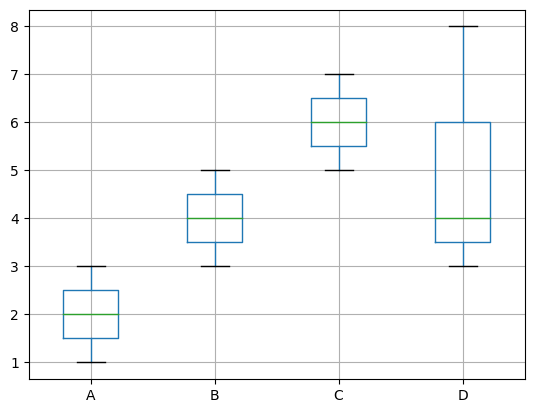

In [12]:
# Подключение библиотек
from scipy.stats import f
import pandas as pd
import matplotlib

# Выборки для сравнения
data = pd.DataFrame({
    'A': [3, 1, 2],
    'B': [5, 3, 4],
    'C': [7, 6, 5],
    'D': [8, 4, 3]
})
m = len(data)
# Вычитаем среднее значение всех элементов
general_mean = data.values.flatten().mean() #Берём значения из фрейма данных, возвращаем копию массива, выраженное в одном числе(flatten), находим среднее(mean)
#Находим внутригрупповую сумму квадратов
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())
#Находим сумму квадратов межгрупповую
ssb = sum(data[group].size * (group_mean - general_mean)**2  for group, group_mean in data.mean().items())
groups = data.shape[1]#Нужно получить размерность массива = 1
dfb = groups - 1 #Число степеней свободы для межгрупповой суммы квадратов
dfw = data.size - groups #Число степеней свободы для внутригрупповой суммы квадратов
# межгрупповой средний квадрат
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw
F = mssb/mssw #Распределение Фишера
p = f.sf(F, dfb, dfw)#Находим p значение для проверки гипотезы
if p > 0.05:
    print(f'Отклоняем нулевую гипотезу, т.к. хотя бы пара средних значимо различается между собой, поскольку p = {p:.3f}')
else:
    print(f'Принимаем нулевую гипотезу, что никаких значимых различий между средними выборками нет, поскольку p = {p:.3f}')
#Визуализация данных
data.boxplot()

**Практическая задача 1. Результаты корректировки дефективного гена.**

В эксперименте было использовано 4 вида терапии, для корректировки экспрессии гена. Было использовано 4 вида терапии по отношению к испытуемым в 4 группах, в результате чего, были получены новые данные по экспрессии гена в каждой из групп.
Необходимо определить: повлияла ли значимо хотя бы одна из терапий на экспрессию гена.
Сформулируем гипотезы

H0 Терапии равносильны, средний уровень экспрессии генов будет одинаковым.

H1 Хотя бы одна терапия оказала значимое влияние на экспрессию гена.

In [68]:
import pandas as pd
import matplotlib
#Загрузка данных
data = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv', sep=',')
data.head()


,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


In [42]:
#Таблица с данными по группам
data_stat = data.groupby("Therapy").agg(["count", "mean", "std"]) #Агрегация по независимой переменной "группа", количество, среднеквадратическое отклонение
data_stat.columns=["N","Mx","SD"]
data_stat

,N,Mx,SD
Therapy,,,
A,15,99.733333,4.165619
B,15,98.800000,5.894307
C,15,94.400000,5.193402
D,15,92.333333,3.735289


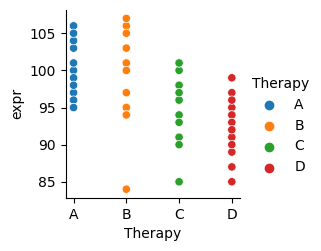

In [77]:
# Визуализация данных посредством seaborn
import seaborn as sns
sns.pairplot(data, y_vars="expr", x_vars=["Therapy"], hue = "Therapy")

In [65]:
#Создадим сводную таблицу с ключевыми характеристиками посредством statmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('expr ~ Therapy', data=data).fit() # expr - столбец с зависимыми данными, Therapy - независимая переменная с 4 градациями.
table = sm.stats.anova_lm(lm)
print(table)

            df       sum_sq     mean_sq         F    PR(>F)
Therapy    3.0   560.716667  186.905556  8.037302  0.000152
Residual  56.0  1302.266667   23.254762       NaN       NaN


Опираясь на полученные данные, что p(0,02) < 0.05, отклоняем нулевую гипотезу. Значит среднее как минимум одной терапии имеет статичетически значимое различие.